<a href="https://colab.research.google.com/github/DrSnek/PocketDoctor/blob/main/Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import itertools
from sklearn.impute import SimpleImputer

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')
!pip install pywaffle

!pip install anvil-uplink

import anvil.server
anvil.server.connect("VFITZUSM3GHE46KQMIY7X3MH-JVTABAU63SWWZ5GO")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 11.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 KB 471.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=140d8d4d77a945ab3d840a9757e990abbbcc02312c9f207ad7634e50036bf90b
  Stored in directory: /root/.cache/pip/wheels/ea/f9/a1/34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
url = "https://drive.google.com/file/d/1GtHJO15RdgU2EoEToqv4ZqgP_3VKBL_O/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [ ]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

In [ ]:
def print_accuracy(y_test, y_pred):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, y_pred)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print()

def draw_confusion_matrix(y_test, y_pred, classes):
  plt.cla()
  plt.clf()
  matrix = confusion_matrix(y_test, y_pred)
  plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.colorbar()
  num_classes = len(classes)
  plt.xticks(np.arange(num_classes), classes, rotation=90)
  plt.yticks(np.arange(num_classes), classes)
  fmt = 'd'
  thresh = matrix.max() / 2.
  for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt), horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.show()
  print()

def draw_roc_curve(y_test, y_score, title, c="blue", line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, color=c, lw=line_width, label = 'AUC = %0.3f' % aucroc)
  plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')
  plt.legend(loc = 'lower right')
  plt.show()
  print()

def draw_roc_curve_individual(y_test, y_score, label, line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, lw=line_width, label = label + ', AUC = %0.3f' % aucroc)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')

# Model:

In [ ]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
print('Inverse of Null Accuracy: ',249/(249+4861))
print('Null Accuracy: ',4861/(4861+249))

Inverse of Null Accuracy:  0.0487279843444227
Null Accuracy:  0.9512720156555773


In [ ]:
user_backup = df
X = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi', 'stroke']].drop("stroke", axis = 1)
Y = df["stroke"].copy()

print("X shape before processing is", X.shape)

# include only numerical features
df_numerical = X.drop(["gender", "hypertension", "heart_disease"], axis = 1)

numerical_pipeline = Pipeline([
                               ("std_scaler", StandardScaler())
                               ])

numerical_features = list(df_numerical)
categorical_features = ["gender", "hypertension", "heart_disease"]

full_pipeline = ColumnTransformer([
                ("numerical", numerical_pipeline, numerical_features), 
                ("categorical", OneHotEncoder(), categorical_features)
                ])
X_prepared = full_pipeline.fit_transform(X)

print("X shape after processing is", X_prepared.shape)

X shape before processing is (5110, 7)
X shape after processing is (5110, 11)


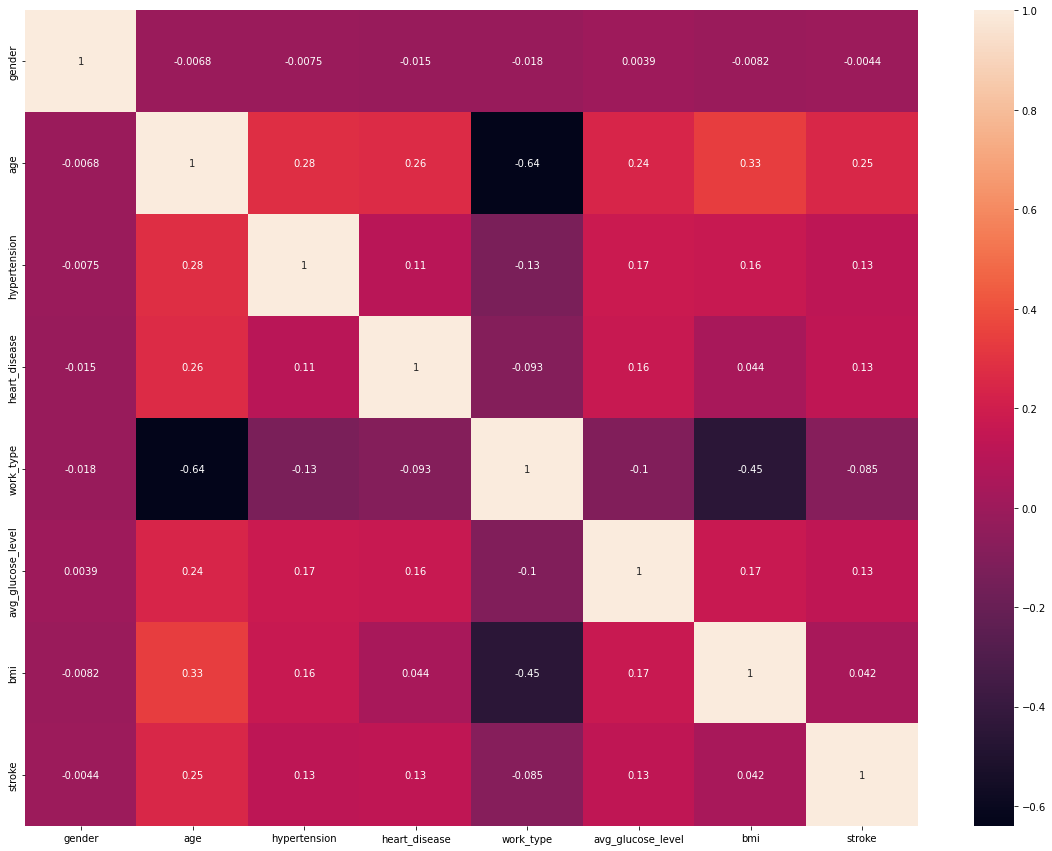

In [ ]:
fig, ax = plt.subplots(figsize=(20,15)) 
corr_df = pd.DataFrame(df, columns=['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi', 'stroke'])

corrMatrix = corr_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
X_train_im, X_test, y_train_im, y_test = train_test_split(X_prepared, Y, train_size=0.3, random_state=42)

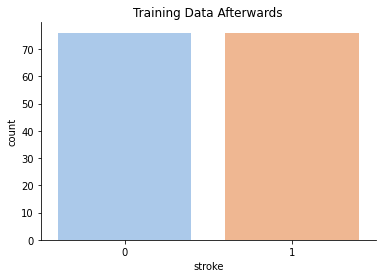

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy="majority", random_state=0)
X_train, y_train = undersampler.fit_resample(X_train_im, y_train_im)

df_target_sm = pd.DataFrame(y_train, columns=["stroke"])
sns.countplot(x="stroke", data=df_target_sm, palette="pastel").set_title("Training Data Afterwards")
sns.despine()

(152, 11)
(152,)
Accuracy:    0.588202
Precision:   0.097274
Recall:      0.907514



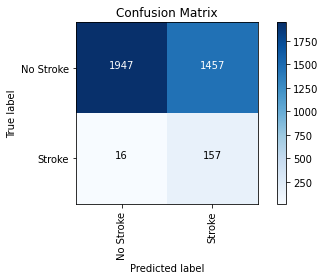

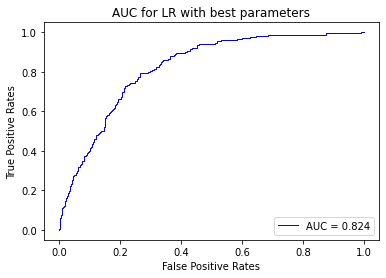

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
# lr_no = LogisticRegression(penalty="l2")
lr_param = {"solver": ['newton-cg', 'lbfgs', 'liblinear'],
            "penalty": ['l2'],
             "C": [100, 10, 1.0, 0.1, 0.01]}

cv_lr = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

# print(lr_no.get_params().keys())
lr_gs = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_param, n_jobs=-1, cv=cv_lr, scoring='recall', error_score=0)
print(X_train.shape)
print(y_train.shape)
lr_gm = lr_gs.fit(X_train, y_train)

lr_gm_pred = lr_gm.predict(X_test)
print_accuracy(y_test, lr_gm_pred)
draw_confusion_matrix(y_test, lr_gm_pred, ["No Stroke", "Stroke"])
lr_score = lr_gm.predict_proba(X_test)[:,1]
draw_roc_curve(y_test, lr_score, "AUC for LR with best parameters", c="blue", line_width=1)
lr_gm.best_params_

In [ ]:
#do not remove id, marry, residence and smoking (they're placeholder values, do not take them from the user and leave them as is)
@anvil.server.callable
def Stroker(genderINP, ageINP, hypertensionINP, work_typeINP, heart_diseaseINP, avg_glucose_levelINP, bmiINP ):
  id = 4000
  marry = "Yes"
  residence = 0
  smoking = "never smoked"
  user_input = [[id, genderINP, ageINP, hypertensionINP, heart_diseaseINP, marry, work_typeINP, residence, avg_glucose_levelINP, bmiINP, smoking]]
  user_df = pd.DataFrame(user_input, columns=['id', 'gender','age','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level','bmi', 'smoking_status'])
  df = user_backup.append(user_df, ignore_index=True)

  X = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi', 'stroke']].drop("stroke", axis = 1)
  Y = df["stroke"].copy()

  # include only numerical features
  df_numerical = X.drop(["gender", "hypertension", "heart_disease"], axis = 1)

  numerical_pipeline = Pipeline([
                                ("std_scaler", StandardScaler())
                                ])

  numerical_features = list(df_numerical)
  categorical_features = ["gender", "hypertension", "heart_disease"]

  full_pipeline = ColumnTransformer([
                  ("numerical", numerical_pipeline, numerical_features), 
                  ("categorical", OneHotEncoder(), categorical_features)
                  ])
  X_prepared = full_pipeline.fit_transform(X)

  user_inp = full_pipeline.fit_transform(X)
  u_prepared = np.array([user_inp[-1][0:11]])
  y_temp = lr_gm.predict(u_prepared)
  return(y_temp[0])
anvil.server.wait_forever()

In [ ]:
'''u_prepared = np.array([user_inp[-1][0:11]])
y_temp = lr_gm.predict(u_prepared)
print(y_temp[0])'''